In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from matplotlib import rc
plt.style.use('fivethirtyeight')
rc('font', family='AppleGothic')
import re

from sklearn.model_selection import train_test_split
from sklearn import metrics # accuracy measure
from sklearn.metrics import confusion_matrix

발표 내용은
1. EDA 과정(시각화)
2. 데이터 전처리 과정(코드공유, 수행한 전처리 이유)
3. 쓴 모델에 대한 설명(이유와 간략한 모델소개)
4. Parameter tuning(과정) 
5. 성능평가
6. Q&A (논의와 토론)
입니다.

데이터 : 국가별 자살 인구수 통계
train set 변수

country 
year 
sex 
age 
suicides_no 
population 
suicides/100k_pop 
country_year
HDI_for_year 
gdp_for_year
gdp_per_capital
generation

변수설명은 따로 안하겠습니다. 변수들이 직관적입니다.

문제: train set에는 1985년부터 2014년까지의 국가 별 자살 인구수 통계가
나와 있습니다. 이 데이터를 가지고 다음 해 국가 별 자살 인구수를 예측하는 문제입니다.

TARGET : suicides_no
평가 지표 : RMSE

※project 주의점
국가 별로 나이나 연도에 따라 자살자 수가 흩어져 있습니다.
국가 별 자살자 총합 예측치를 보내주세요.
sample set처럼 보내주세요(sample set y_pred는 그냥 랜덤값입니다.)

궁금한점은 공동대표 이예찬에게 문의주세요

In [3]:
data = pd.read_csv("train.csv")

In [4]:
data.groupby(['country','year'])[['population','suicides_no']].sum()

population  suicides_no
country             year                         
Albania             1987     2709600           73
                    1988     2764300           63
                    1989     2803100           68
                    1992     2822500           47
                    1993     2807300           73
                    1994     2849300           50
                    1995     2903400           88
                    1996     2940200           89
                    1997     2977300          170
                    1998     3012700          154
                    1999     3029700          139
                    2000     2796300           54
                    2001     2799349          119
                    2002     2818839          133
                    2003     2843929          124
                    2004     2874991          146
                    2005     2783320            0
                    2006     2780176            0
                    2007     2770344          124
                    2008     2757059          160
                    2009     2745735            0
                    2010     2736025           96
Antigua and Barbuda 1985       62574            0
                    1986       61270            0
                    1987       60261            0
                    1988       59564            0
                    1989       59238            0
                    1990       59334            1
                    1991       60394            0
                    1992       61741            0
...                              ...          ...
Uruguay             2006     3077445          528
                    2007     3087957          576
                    2008     3100791          523
                    2009     3114306          511
                    2010     3127306          547
                    2012     3151939          599
                    2013     3164670          546
                    2014     3177645          591
Uzbekistan          1990    17165700         1459
                    1991    17347800         1393
                    1992    18257000         1344
                    1993    18509300         1355
                    1994    19144700         1419
                    1995    19599000         1485
                    1996    19854500         1699
                    1997    20364300         1554
                    1998    20861200         1620
                    1999    21329916         1795
                    2000    21789067         1919
                    2001    22231527         1914
                    2002    22632256         1576
                    2003    22982883         1416
                    2004    23300841         1251
                    2005    23600347         1221
                    2009    25288102         1399
                    2010    25651783         1464
                    2011    25978049         1640
                    2012    26381830         1835
                    2013    26838924         1950
                    2014    27313507         2095

[2243 rows x 2 columns]

# 분석 

In [5]:
age_c = {}
age_c['5-14'] = 0
age_c['15-24'] = 1
age_c['25-34'] = 2
age_c['35-54'] = 3
age_c['55-74'] = 4
age_c['75+'] = 5

In [6]:
data = pd.read_csv("train.csv")

In [7]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_100k_pop', 'country_year', 'HDI_for_year', 'gdp_for_year',
       'gdp_per_capital', 'generation'],
      dtype='object')

In [8]:
data.gdp_per_capital.dtype

dtype('int64')

In [9]:
nation={}
for idx, i in enumerate(data.country.unique()):
    nation[i] = idx

In [10]:
data.age = data.age.map(lambda x: age_c[x.split(" ")[0]])
data.gdp_for_year = data.gdp_for_year.map(lambda x: re.sub(",","",x)).astype(int)
country = data.country.unique()
data.country = data['country'].map(lambda x: nation[x])
#.astype(pd.api.types.CategoricalDtype(categories = data.country.unique()))
df = data.groupby(['country']).agg({
    'population':'mean','suicides_no':'mean',
    'gdp_for_year':'mean','gdp_per_capital':'mean'
}).reset_index()

In [11]:
from numpy import mean
data2 = data.groupby(['country','year']).agg({'population':'sum','suicides_no':'sum','gdp_for_year':'mean',"gdp_per_capital":'mean','suicides_100k_pop':"sum"}).reset_index()


In [12]:
data2.country.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [13]:
data2
temp = data2.copy()

In [14]:

# temp.country = temp.country.astype(pd.api.types.CategoricalDtype(categories = temp.country.unique()))
# temp.country = temp.country.cat.codes
# temp.country.unique()

In [15]:
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()
# test = temp[['suicides_no','gdp_for_year','gdp_per_capital','population']]
# scaler.fit(test)
# test = scaler.transform(test)
# test = pd.DataFrame(test)
# test.columns = ['suicides_no','gdp_for_year','gdp_per_capital','population']
# test

In [16]:
#test['year'] = temp.year

In [17]:
# test['nation'] = nation.to_frame('nation')

In [18]:
# test

In [19]:
# y = test.suicides_no
# X = test.iloc[:,1:4]
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .3, random_state = 0)
# model = LinearRegression().fit(X_train,y_train)
# print(str(model.score(X_train, y_train)))
# print("Acc for LinearRegression: {}".format(model.score(X_test,y_test)))

In [20]:
X = temp.drop(['year'],axis=1)[['country','population','gdp_for_year','gdp_per_capital']]
y = temp['suicides_no']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .3, random_state = 0)

### Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model = LinearRegression().fit(X_train,y_train)
print(model.score(X_train, y_train))
print("Acc for LinearRegression: {}".format(model.score(X_test,y_test)))

0.6421698184873958
Acc for LinearRegression: 0.6502026809471684


### Ridge, Lasso 

In [24]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
model = Ridge().fit(X_train, y_train)
print("acc for Ridge: {}".format(model.score(X_test, y_test)))
model = Lasso().fit(X_train,y_train)
print("acc for Lasso: {}".format(model.score(X_test, y_test)))

acc for Ridge: 0.6502026813777653
acc for Lasso: 0.6502027478630532


/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.08265e-22): result may not be accurate.
  overwrite_a=True).T


### Cross Validation

해본 결과 딱히 쓸모없음

In [25]:
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import cross_val_predict

# kfold = KFold(n_splits = 10, random_state =22) # 10개의 equal parts로 구분함.
# xyz = []
# accuracy = []
# std = []
# model = [LinearRegression(), Ridge(),Lasso()]
# for i in model:
#     model = i
#     cv_result = cross_val_predict(model, X, y, cv = kfold)
#     xyz.append(cv_result.mean())
#     std.append(cv_result.std())
#     accuracy.append(cv_result)
# df = pd.DataFrame({'cv_mean':xyz, 'std':std})

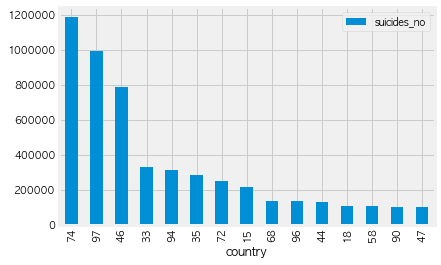

In [26]:
data.groupby(['country']).suicides_no.sum().to_frame('suicides_no').sort_values('suicides_no',ascending=False)[:15].plot(kind='bar')
# plt.figsize=(30,30)

In [27]:
#We manually put all the differnt countries into one of 6 regions
Europe = ["Albania","Russian Federation","France","Ukraine","Germany","Poland","United Kingdom",
         "Italy","Spain","Hungary","Romania","Belgium","Belarus","Netherlands","Austria",
         "Czech Republic","Sweden","Bulgaria","Finland","Lithuania","Switzerland","Serbia",
         "Portugal","Croatia","Norway","Denmark","Slovakia","Latvia","Greece","Slovenia",
         "Turkey","Estonia","Georgia","Albania","Luxembourg","Armenia","Iceland","Montenegro",
         "Cyprus","Bosnia and Herzegovina","San Marino","Malta","Ireland"]
NorthAmerica = ["United States","Mexico","Canada","Cuba","El Salvador","Puerto Rico",
                "Guatemala","Costa Rica","Nicaragua","Belize","Jamaica"]
SouthAmerica = ["Brazil","Colombia", "Chile","Ecuador","Uruguay","Paraguay","Argentina",
                "Panama","Guyana","Suriname"]
MiddleEast = ["Kazakhstan","Uzbekistan","Kyrgyzstan","Israel","Turkmenistan","Azerbaijan",
              "Kuwait","United Arab Emirates","Qatar","Bahrain","Oman"]
Asia = ["Japan","Republic of Korea", "Thailand", "Sri Lanka","Philippines","New Zealand",
        "Australia","Singapore","Macau","Mongolia"]

def match_region(x):
    if x in Europe:
        x = 'Europe'
    elif x in NorthAmerica:
        x = 'North America'
    elif x in SouthAmerica:
        x = 'South America'
    elif x in MiddleEast:
        x = 'MiddleEast'
    elif x in Asia:
        x = 'Asia'
    else:
        x = 'Island Nation'
    return x

### RandomForestRegressor - 1. groupby로 국가-연도별로 축약 시

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .3, random_state = 0)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)
model.score(X_test, y_test)

0.9918619649323773

In [29]:
tmp = pd.read_csv("test_mini.csv")

In [30]:
tmpctry = tmp.country

In [31]:
tmp.country = tmp['country'].map(lambda x: nation[x])

tmp.gdp_for_year = tmp.gdp_for_year.map(lambda x: re.sub(",","",x)).astype(int)

dta = tmp.groupby(['country','year']).agg({'population':'sum','gdp_for_year':'mean',"gdp_per_capital":'mean'}).reset_index()

In [32]:
X.columns

Index(['country', 'population', 'gdp_for_year', 'gdp_per_capital'], dtype='object')

In [33]:
dta = dta[['country', 'population', 'gdp_for_year', 'gdp_per_capital']]

In [34]:
#tmp.country = tmp['country'].astype(pd.api.types.CategoricalDtype(categories = tmp.country.unique()))
#tmp.gdp_for_year = tmp.gdp_for_year.map(lambda x: re.sub(",","",x)).astype(int)
#dta = tmp.groupby(['country','year']).agg({'population':'sum','gdp_for_year':'mean',"gdp_per_capital":'mean'}).reset_index()

t = pd.concat([dta,pd.Series(model.predict(dta)).to_frame('predict')],axis=1)

t =pd.concat([t,pd.Series(tmpctry.unique()).to_frame("country")],axis=1)

t

,country,population,gdp_for_year,gdp_per_capital,predict,country
0,1,91889,1364863037,14853,0.82,Antigua and Barbuda
1,2,39699624,594749285413,14981,4845.89,Argentina
2,3,2795335,10553337673,3775,64.20,Armenia
3,5,22240785,1349034029453,60656,2773.96,Australia
4,6,8219386,382065930308,46484,1285.17,Austria
5,12,10624356,455039563133,42830,1715.59,Belgium
6,13,319835,1778567600,5561,16.73,Belize
7,15,191087085,1802214373741,9431,10157.49,Brazil
8,19,16565725,243999477738,14729,2003.16,Chile
9,20,44490427,291519591533,6552,4732.48,Colombia


In [35]:
result = pd.read_csv("who_suicide_statistics.csv")

In [36]:
compare = result.query('year == 2015').groupby(['country','year']).agg({'population':'sum','suicides_no':'sum'}).reset_index()

t.iloc[:,1:]

rst = pd.merge(compare, t.iloc[:,1:], on = 'country')
rst

,country,year,population_x,suicides_no,population_y,gdp_for_year,gdp_per_capital,predict
0,Antigua and Barbuda,2015,91889.0,1.0,91889,1364863037,14853,0.82
1,Argentina,2015,39699624.0,3073.0,39699624,594749285413,14981,4845.89
2,Armenia,2015,2795335.0,74.0,2795335,10553337673,3775,64.20
3,Australia,2015,22240785.0,3027.0,22240785,1349034029453,60656,2773.96
4,Austria,2015,8219386.0,1251.0,8219386,382065930308,46484,1285.17
5,Belgium,2015,10624356.0,1867.0,10624356,455039563133,42830,1715.59
6,Belize,2015,319835.0,26.0,319835,1778567600,5561,16.73
7,Brazil,2015,191087085.0,11163.0,191087085,1802214373741,9431,10157.49
8,Chile,2015,16565725.0,1838.0,16565725,243999477738,14729,2003.16
9,Colombia,2015,44490427.0,2332.0,44490427,291519591533,6552,4732.48


In [37]:
y_true = rst.suicides_no
y_pred = rst.predict
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_true, y_pred))

3330.731949918792

In [38]:
rst['err'] = rst['suicides_no'] - rst['predict']

rst['err_abs'] = abs(rst['err'])

rst.sort_values('err_abs',ascending=False)
# 전반적으로 과대예측한 경향이 있음.

,country,year,population_x,suicides_no,population_y,gdp_for_year,gdp_per_capital,predict,err,err_abs
35,Mexico,2015,114357884.0,6234.0,114357884,1169622672463,10228,26554.44,-20320.44,20320.44
45,Russian Federation,2015,137018943.0,25432.0,137018943,1368400705491,9987,38631.91,-13199.91,13199.91
27,Japan,2015,120376310.0,23092.0,120376310,4394977752878,36510,31112.10,-8020.10,8020.10
22,Guatemala,2015,14258397.0,494.0,14258397,63767597194,4472,3838.51,-3344.51,3344.51
9,Colombia,2015,44490427.0,2332.0,44490427,291519591533,6552,4732.48,-2400.48,2400.48
1,Argentina,2015,39699624.0,3073.0,39699624,594749285413,14981,4845.89,-1772.89,1772.89
43,Republic of Korea,2015,48671752.0,13510.0,48671752,1382764027114,28410,12318.72,1191.28,1191.28
7,Brazil,2015,191087085.0,11163.0,191087085,1802214373741,9431,10157.49,1005.51,1005.51
52,Spain,2015,44186528.0,3604.0,44186528,1197789902774,27108,4491.88,-887.88,887.88
40,Poland,2015,36086575.0,5420.0,36086575,477355617456,13228,6256.93,-836.93,836.93


### RandomForest - 2. 원본데이터에 약간의 변형

In [1135]:
data = pd.read_csv("train.csv")

data.generation.unique()
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# data2 = data[['suicides_no','gdp_for_year']]

# scaler.fit(data2)
# data2 = scaler.transform(data2)
# data2 = pd.DataFrame(data2)
# data2.columns = ['suicides_no','gdp_for_year']
generations = {}
for idx, i in enumerate(data.generation.unique()):
    generations[i] = idx

In [1136]:
data

,country,year,sex,age,suicides_no,population,suicides_100k_pop,country_year,HDI_for_year,gdp_for_year,gdp_per_capital,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [1106]:
data = data.query('year > 1990 and year <=2015')
data.gdp_for_year = data.gdp_for_year.map(lambda x: re.sub(",","",x)).astype(int)
#data['RT_population'] = np.sqrt(data['population'].copy())

# 성장세 / 하향세 구분
- overfit 강화 결과 초래

In [1107]:
# def decade_mapping(data):
#     if 1990< data <= 1998:
#         return "1991-1998"
#     elif 1999<= data <= 2006:
#         return "1999-2006"
#     else: # 07 ~ 14
#         return "2007-2014"
# data['year_sep'] = data.year.apply(decade_mapping)

# zone_assess = data.groupby(["country","year_sep"])['suicides_100k_pop'].sum().reset_index()

# three_gen = zone_assess.country.value_counts().reset_index(name = "count")
# three_gen.columns = ["country", "counts"]
# three_gen_countries = three_gen[three_gen.counts == 3].country.tolist()
# len(three_gen_countries)

# nations = three_gen_countries
# years = zone_assess.year_sep.unique()
# green_zones = []
# danger_zones = []
# for country in nations:
#     s_year1 = float(zone_assess[(zone_assess.country == country) & (zone_assess.year_sep == "1991-1998")]["suicides_100k_pop"])
#     s_year2 = list(zone_assess[(zone_assess.country == country) & (zone_assess.year_sep == "1999-2006")]["suicides_100k_pop"])[0]
#     s_year3 = list(zone_assess[(zone_assess.country == country) & (zone_assess.year_sep == "2007-2014")]["suicides_100k_pop"])[0]
    
#     if s_year1 <= s_year2 <= s_year3:
#         danger_zones.append(country)
#     if s_year1 >= (s_year2) >= (s_year3):
#         green_zones.append(country)

# green_zones

# danger_zones
# data['dec'] = data.country.map(lambda x: 1 if x in danger_zones else 0)
# data['inc'] = data.country.map(lambda x: 1 if x in green_zones else 0)

In [1108]:
from sklearn.preprocessing import StandardScaler
scaler1= StandardScaler()
scaler2 = StandardScaler()
scale1 = np.array(data['population']).reshape(-1,1)
scale2 = np.array(data['suicides_no']).reshape(-1,1)
scaler1.fit(scale1)
scaler2.fit(scale2)
scale1 = scaler1.transform(scale1)
scale2 = scaler2.transform(scale2)
data['suicides_no'] = scale2[:,0]
data['population'] = scale1[:,0]

/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [1109]:
quartile_range = pd.qcut(data['gdp_for_year'],5).unique()

In [1110]:
def quartile(x):
    if x <= quartile_range[0].right:
        x = '80~100'
    elif x <= quartile_range[1].right:
        x = '60~80'
    elif x <= quartile_range[2].right:
        x = '40~60'
    elif x <= quartile_range[3].right:
        x = '20~40'
    else:
        x='0~20'
    return x

In [1111]:
quartile_range

[(46919624.999, 6384451606.0], (6384451606.0, 25226393197.0], (103904537815.0, 380191881860.0], (25226393197.0, 103904537815.0], (380191881860.0, 17427609000000.0]]
Categories (5, interval[float64]): [(46919624.999, 6384451606.0] < (6384451606.0, 25226393197.0] < (25226393197.0, 103904537815.0] < (103904537815.0, 380191881860.0] < (380191881860.0, 17427609000000.0]]

In [1112]:
data.age = data.age.map(lambda x: x.split(" ")[0])
#data.country = data.country.map(lambda x: nation[x])
#data.generation = data.generation.map(lambda x: generations[x])

#data['suicides_^2'] = data['suicides_100k_pop'] **2
#data.sex = data.sex.astype(pd.api.types.CategoricalDtype(categories = data.sex.unique()))
#data.sex = data.sex.cat.codes
#data['top10'] = data.country.map(lambda x: 1 if x in top10 else 0)
data['RT_gdp_per_capital'] = np.sqrt(data['gdp_per_capital'])
#data['RT_population'] = np.sqrt(data['population'])
#data['RT_population'] = data['population'] **2
#data['RT_gdp_for_year'] = np.sqrt(data['gdp_for_year'])

data['quartile'] = data.gdp_for_year.map(lambda x: quartile(x))

In [1113]:
df=data.copy().drop(['HDI_for_year','suicides_100k_pop','country_year'],axis=1)

In [1114]:
# df = data.copy()
# df = df[['country','year', 'sex', 'age', 'suicides_no', 'population',
#      'gdp_for_year',
#        'gdp_per_capital', 'generation','RT_gdp_per_capital','RT_gdp_for_year']]

In [1115]:
# df.country = df.country.cat.codes
# df.generation = df.generation.cat.code
df['region'] = df.country.map(lambda x: match_region(x))

In [1116]:
y = df['suicides_no']
X = df.drop(['suicides_no','country'],axis = 1)

del X['region']
del X['sex']

#del X['year_sep']

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
#X.popula
del X['age']
del X['generation']
del X['quartile']
X.columns

In [1119]:
X = pd.concat([X, pd.get_dummies(df[['region','age','sex','generation','quartile']])],axis=1)

In [1120]:
X.head()

,year,population,gdp_for_year,gdp_per_capital,RT_gdp_per_capital,region_Asia,region_Europe,region_Island Nation,region_MiddleEast,region_North America,...,generation_Boomers,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent,quartile_0~20,quartile_40~60,quartile_60~80,quartile_80~100
36,1992,-0.381361,709452584,251,15.84298,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
37,1992,-0.401797,709452584,251,15.84298,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
38,1992,-0.428383,709452584,251,15.84298,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
39,1992,-0.406441,709452584,251,15.84298,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
40,1992,-0.394475,709452584,251,15.84298,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [1121]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state = 3)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=50,random_state=0).fit(X_train, y_train)
model.score(X_test, y_test)
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

0.11966671604115513

/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Antigua and Barbuda
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'sex_female', 'sex_male', 'generation_Boomers',
       'generation_G.I. Generation', 'generation_Generation X',
       'generation_Generation Z', 'generation_Millenials',
       'generation_Silent'],
      dtype='object')
Argentina
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'sex_female', 'sex_male', 'generation_Boomers',
       'generation_G.I. Generation', 'generation_Generation X',
       'generation_Generation Z', 'generation_Millenials',
       'generation_Silent'],
      dtype='object')
Armenia
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age

/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Belize
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'sex_female', 'sex_male', 'generation_Boomers',
       'generation_G.I. Generation', 'generation_Generation X',
       'generation_Generation Z', 'generation_Millenials',
       'generation_Silent'],
      dtype='object')
Brazil
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'sex_female', 'sex_male', 'generation_Boomers',
       'generation_G.I. Generation', 'generation_Generation X',
       'generation_Generation Z', 'generation_Millenials',
       'generation_Silent'],
      dtype='object')
Chile
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'sex_female

/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Colombia
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'sex_female', 'sex_male', 'generation_Boomers',
       'generation_G.I. Generation', 'generation_Generation X',
       'generation_Generation Z', 'generation_Millenials',
       'generation_Silent'],
      dtype='object')
Croatia
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'sex_female', 'sex_male', 'generation_Boomers',
       'generation_G.I. Generation', 'generation_Generation X',
       'generation_Generation Z', 'generation_Millenials',
       'generation_Silent'],
      dtype='object')
Cuba
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'sex_fema

/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Cyprus
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'sex_female', 'sex_male', 'generation_Boomers',
       'generation_G.I. Generation', 'generation_Generation X',
       'generation_Generation Z', 'generation_Millenials',
       'generation_Silent'],
      dtype='object')
Czech Republic
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'sex_female', 'sex_male', 'generation_Boomers',
       'generation_G.I. Generation', 'generation_Generation X',
       'generation_Generation Z', 'generation_Millenials',
       'generation_Silent'],
      dtype='object')
Denmark
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', '

/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Ecuador
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'sex_female', 'sex_male', 'generation_Boomers',
       'generation_G.I. Generation', 'generation_Generation X',
       'generation_Generation Z', 'generation_Millenials',
       'generation_Silent'],
      dtype='object')
Estonia
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'sex_female', 'sex_male', 'generation_Boomers',
       'generation_G.I. Generation', 'generation_Generation X',
       'generation_Generation Z', 'generation_Millenials',
       'generation_Silent'],
      dtype='object')
Finland
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'sex_fe

/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Georgia
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'sex_female', 'sex_male', 'generation_Boomers',
       'generation_G.I. Generation', 'generation_Generation X',
       'generation_Generation Z', 'generation_Millenials',
       'generation_Silent'],
      dtype='object')
Germany
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'sex_female', 'sex_male', 'generation_Boomers',
       'generation_G.I. Generation', 'generation_Generation X',
       'generation_Generation Z', 'generation_Millenials',
       'generation_Silent'],
      dtype='object')
Greece
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'sex_fem

/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Grenada
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'sex_female', 'sex_male', 'generation_Boomers',
       'generation_G.I. Generation', 'generation_Generation X',
       'generation_Generation Z', 'generation_Millenials',
       'generation_Silent'],
      dtype='object')
Guatemala
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'sex_female', 'sex_male', 'generation_Boomers',
       'generation_G.I. Generation', 'generation_Generation X',
       'generation_Generation Z', 'generation_Millenials',
       'generation_Silent'],
      dtype='object')
Hungary
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'sex_

/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Iceland
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'sex_female', 'sex_male', 'generation_Boomers',
       'generation_G.I. Generation', 'generation_Generation X',
       'generation_Generation Z', 'generation_Millenials',
       'generation_Silent'],
      dtype='object')
Israel
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'sex_female', 'sex_male', 'generation_Boomers',
       'generation_G.I. Generation', 'generation_Generation X',
       'generation_Generation Z', 'generation_Millenials',
       'generation_Silent'],
      dtype='object')
Italy
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'sex_femal

/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Japan
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'sex_female', 'sex_male', 'generation_Boomers',
       'generation_G.I. Generation', 'generation_Generation X',
       'generation_Generation Z', 'generation_Millenials',
       'generation_Silent'],
      dtype='object')
Kazakhstan
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'sex_female', 'sex_male', 'generation_Boomers',
       'generation_G.I. Generation', 'generation_Generation X',
       'generation_Generation Z', 'generation_Millenials',
       'generation_Silent'],
      dtype='object')
Kyrgyzstan
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'se

/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Latvia
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'sex_female', 'sex_male', 'generation_Boomers',
       'generation_G.I. Generation', 'generation_Generation X',
       'generation_Generation Z', 'generation_Millenials',
       'generation_Silent'],
      dtype='object')
Lithuania
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'sex_female', 'sex_male', 'generation_Boomers',
       'generation_G.I. Generation', 'generation_Generation X',
       'generation_Generation Z', 'generation_Millenials',
       'generation_Silent'],
      dtype='object')
Luxembourg
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'se

/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Malta
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'sex_female', 'sex_male', 'generation_Boomers',
       'generation_G.I. Generation', 'generation_Generation X',
       'generation_Generation Z', 'generation_Millenials',
       'generation_Silent'],
      dtype='object')
Mauritius
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'sex_female', 'sex_male', 'generation_Boomers',
       'generation_G.I. Generation', 'generation_Generation X',
       'generation_Generation Z', 'generation_Millenials',
       'generation_Silent'],
      dtype='object')
Mexico
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'sex_fem

/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Netherlands
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'sex_female', 'sex_male', 'generation_Boomers',
       'generation_G.I. Generation', 'generation_Generation X',
       'generation_Generation Z', 'generation_Millenials',
       'generation_Silent'],
      dtype='object')
Nicaragua
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'sex_female', 'sex_male', 'generation_Boomers',
       'generation_Generation X', 'generation_Generation Z',
       'generation_Millenials', 'generation_Silent'],
      dtype='object')
Norway
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'sex_female', 'sex_male', 'generation_B

/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Panama
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'sex_female', 'sex_male', 'generation_Boomers',
       'generation_G.I. Generation', 'generation_Generation X',
       'generation_Generation Z', 'generation_Millenials',
       'generation_Silent'],
      dtype='object')
Poland
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'sex_female', 'sex_male', 'generation_Boomers',
       'generation_G.I. Generation', 'generation_Generation X',
       'generation_Generation Z', 'generation_Millenials',
       'generation_Silent'],
      dtype='object')
Puerto Rico
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'sex_

/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Qatar
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'sex_female', 'sex_male', 'generation_Boomers',
       'generation_G.I. Generation', 'generation_Generation X',
       'generation_Generation Z', 'generation_Millenials',
       'generation_Silent'],
      dtype='object')
Republic of Korea
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'sex_female', 'sex_male', 'generation_Boomers',
       'generation_G.I. Generation', 'generation_Generation X',
       'generation_Generation Z', 'generation_Millenials',
       'generation_Silent'],
      dtype='object')
Romania
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+',

/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Russian Federation
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'sex_female', 'sex_male', 'generation_Boomers',
       'generation_G.I. Generation', 'generation_Generation X',
       'generation_Generation Z', 'generation_Millenials',
       'generation_Silent'],
      dtype='object')
Saint Vincent and Grenadines
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'sex_female', 'sex_male', 'generation_Boomers',
       'generation_G.I. Generation', 'generation_Generation X',
       'generation_Generation Z', 'generation_Millenials',
       'generation_Silent'],
      dtype='object')
Serbia
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       

/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Seychelles
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'sex_female', 'sex_male', 'generation_Boomers',
       'generation_Generation X', 'generation_Generation Z',
       'generation_Millenials', 'generation_Silent'],
      dtype='object')
Singapore
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'sex_female', 'sex_male', 'generation_Boomers',
       'generation_G.I. Generation', 'generation_Generation X',
       'generation_Generation Z', 'generation_Millenials',
       'generation_Silent'],
      dtype='object')
Slovenia
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'sex_female', 'sex_male', 'generation_

/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


South Africa
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'sex_female', 'sex_male', 'generation_Boomers',
       'generation_G.I. Generation', 'generation_Generation X',
       'generation_Generation Z', 'generation_Millenials',
       'generation_Silent'],
      dtype='object')
Spain
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'sex_female', 'sex_male', 'generation_Boomers',
       'generation_G.I. Generation', 'generation_Generation X',
       'generation_Generation Z', 'generation_Millenials',
       'generation_Silent'],
      dtype='object')
Sweden
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'sex_

/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Switzerland
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'sex_female', 'sex_male', 'generation_Boomers',
       'generation_G.I. Generation', 'generation_Generation X',
       'generation_Generation Z', 'generation_Millenials',
       'generation_Silent'],
      dtype='object')
Thailand
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'sex_female', 'sex_male', 'generation_Boomers',
       'generation_G.I. Generation', 'generation_Generation X',
       'generation_Generation Z', 'generation_Millenials',
       'generation_Silent'],
      dtype='object')
Turkey
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'se

/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Turkmenistan
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'sex_female', 'sex_male', 'generation_Boomers',
       'generation_G.I. Generation', 'generation_Generation X',
       'generation_Generation Z', 'generation_Millenials',
       'generation_Silent'],
      dtype='object')
Ukraine
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'sex_female', 'sex_male', 'generation_Boomers',
       'generation_G.I. Generation', 'generation_Generation X',
       'generation_Generation Z', 'generation_Millenials',
       'generation_Silent'],
      dtype='object')
United Kingdom
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_7

/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


United States
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'sex_female', 'sex_male', 'generation_Boomers',
       'generation_G.I. Generation', 'generation_Generation X',
       'generation_Generation Z', 'generation_Millenials',
       'generation_Silent'],
      dtype='object')
Uruguay
Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14',
       'age_55-74', 'age_75+', 'sex_female', 'sex_male', 'generation_Boomers',
       'generation_G.I. Generation', 'generation_Generation X',
       'generation_Generation Z', 'generation_Millenials',
       'generation_Silent'],
      dtype='object')


In [1214]:
pd.DataFrame({'nation':ccc,'pred':forecast})

,nation,pred
0,Antigua and Barbuda,0.438341
1,Argentina,3164.900000
2,Armenia,69.430457
3,Australia,2791.420000
4,Austria,1302.120000
5,Belgium,1946.120000
6,Belize,22.270392
7,Brazil,10161.320000
8,Chile,1884.140000
9,Colombia,2202.120000


In [1180]:
# temp = data.groupby(['year','country']).suicides_no.sum().reset_index()
# temp.country.unique()
# from statsmodels.tsa.arima_model import ARIMA
# for i in temp.country.unique():
#     d = temp.loc[temp.country == i].suicides_no
    
#     model_fit = ARIMA(d, order=(1,2,1))
#     model_fit = model_fit.fit(trend='nc',full_output=True, disp=1)
#     print(i)
#     print(model_fit.summary())

['d']

In [1174]:
# sm.graphics.tsaplots.plot_acf(temp.values)

In [1175]:
# sm.graphics.tsaplots.plot_pacf(temp.values)

In [1122]:
tmp = pd.read_csv("test_mini.csv")

tmp.head()
#tmp['RT_population'] = np.sqrt(tmp.population.copy())

,country,year,sex,age,population,suicides_100k_pop,country_year,HDI_for_year,gdp_for_year,gdp_per_capital,generation
0,Antigua and Barbuda,2015,female,55-74 years,6403,15.62,Antigua and Barbuda2015,NaN,"1,364,863,037",14853,Boomers
1,Antigua and Barbuda,2015,female,15-24 years,8561,0.00,Antigua and Barbuda2015,NaN,"1,364,863,037",14853,Millenials
2,Antigua and Barbuda,2015,female,25-34 years,7740,0.00,Antigua and Barbuda2015,NaN,"1,364,863,037",14853,Millenials
3,Antigua and Barbuda,2015,female,35-54 years,15323,0.00,Antigua and Barbuda2015,NaN,"1,364,863,037",14853,Generation X
4,Antigua and Barbuda,2015,female,5-14 years,8239,0.00,Antigua and Barbuda2015,NaN,"1,364,863,037",14853,Generation Z


In [1123]:
tmp.gdp_for_year = tmp.gdp_for_year.map(lambda x: re.sub(",","",x)).astype(int)
# tmp['dec'] = tmp.country.map(lambda x: 1 if x in danger_zones else 0)
# tmp['inc'] = tmp.country.map(lambda x: 1 if x in green_zones else 0)
ss = scaler1.transform(np.array(tmp['population']).reshape(-1,1))
#tmp.gdp_for_year = ss[:,0]
tmp.population = ss[:,0]

/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [1124]:

#tmp.country = tmp['country'].map(lambda x: nation[x])
#tmp.sex = tmp.sex.astype(pd.api.types.CategoricalDtype(categories = tmp.sex.unique()))
#tmp.sex = tmp.sex.cat.codes
#tmp.generation = tmp.generation.map(lambda x: generations[x])
tmp.age = tmp.age.map(lambda x: x.split(" ")[0])

tmp['RT_gdp_per_capital'] = np.sqrt(tmp.gdp_per_capital)
#tmp['RT_population'] = np.sqrt(tmp.population)
#tmp['RT_gdp_for_year'] = np.sqrt(tmp['gdp_for_year'])

#tmp['suicides_^2'] = tmp['suicides_100k_pop']**2
#tmp['top20'] = tmp.country.map(lambda x: 1 if x in top10 else 0)
tmp['region'] = tmp.country.map(lambda x: match_region(x))
tmp['quartile'] = tmp.gdp_for_year.map(lambda x: quartile(x))

In [1125]:
ss = pd.get_dummies(tmp[['region','age','sex','generation','quartile']])

#tmp.population = tmp.population.map(lambda x: np.log(x))

tmp = tmp.drop(['sex','age','generation','country_year','HDI_for_year','country','region','suicides_100k_pop','quartile'],axis=1)
#tmp.gdp_for_year = tmp.gdp_for_year.map(lambda x: np.log(x))
tmp = pd.concat([tmp,ss],axis=1)

In [1126]:
tmp

,year,population,gdp_for_year,gdp_per_capital,RT_gdp_per_capital,quartile,region_Asia,region_Europe,region_Island Nation,region_MiddleEast,...,sex_male,generation_Boomers,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent,quartile_0~20,quartile_40~60,quartile_60~80,quartile_80~100
0,2015,-0.467444,1364863037,14853,121.872885,80~100,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,2015,-0.466894,1364863037,14853,121.872885,80~100,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,2015,-0.467103,1364863037,14853,121.872885,80~100,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
3,2015,-0.465169,1364863037,14853,121.872885,80~100,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,2015,-0.466976,1364863037,14853,121.872885,80~100,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
5,2015,-0.468638,1364863037,14853,121.872885,80~100,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
6,2015,-0.466953,1364863037,14853,121.872885,80~100,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
7,2015,-0.467277,1364863037,14853,121.872885,80~100,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
8,2015,-0.465667,1364863037,14853,121.872885,80~100,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1
9,2015,-0.466969,1364863037,14853,121.872885,80~100,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1


In [1127]:
X.columns

Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'region_Asia', 'region_Europe',
       'region_Island Nation', 'region_MiddleEast', 'region_North America',
       'region_South America', 'age_15-24', 'age_25-34', 'age_35-54',
       'age_5-14', 'age_55-74', 'age_75+', 'sex_female', 'sex_male',
       'generation_Boomers', 'generation_G.I. Generation',
       'generation_Generation X', 'generation_Generation Z',
       'generation_Millenials', 'generation_Silent', 'quartile_0~20',
       'quartile_40~60', 'quartile_60~80', 'quartile_80~100'],
      dtype='object')

In [1128]:
tmp['generation_G.I. Generation'] = 0

tmp = tmp.reindex(columns = X.columns)

tmp.columns

Index(['year', 'population', 'gdp_for_year', 'gdp_per_capital',
       'RT_gdp_per_capital', 'region_Asia', 'region_Europe',
       'region_Island Nation', 'region_MiddleEast', 'region_North America',
       'region_South America', 'age_15-24', 'age_25-34', 'age_35-54',
       'age_5-14', 'age_55-74', 'age_75+', 'sex_female', 'sex_male',
       'generation_Boomers', 'generation_G.I. Generation',
       'generation_Generation X', 'generation_Generation Z',
       'generation_Millenials', 'generation_Silent', 'quartile_0~20',
       'quartile_40~60', 'quartile_60~80', 'quartile_80~100'],
      dtype='object')

In [1129]:
tmp.head()

,year,population,gdp_for_year,gdp_per_capital,RT_gdp_per_capital,region_Asia,region_Europe,region_Island Nation,region_MiddleEast,region_North America,...,generation_Boomers,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent,quartile_0~20,quartile_40~60,quartile_60~80,quartile_80~100
0,2015,-0.467444,1364863037,14853,121.872885,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,2015,-0.466894,1364863037,14853,121.872885,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2015,-0.467103,1364863037,14853,121.872885,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2015,-0.465169,1364863037,14853,121.872885,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,2015,-0.466976,1364863037,14853,121.872885,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [1130]:
#scaler2.inverse_transform(np.array(model.predict(tmp)).reshape(-1,1)).flatten()

In [1131]:
t = pd.concat([tmp,pd.Series(scaler2.inverse_transform(np.array(model.predict(tmp)).reshape(-1,1)).flatten()).to_frame('predict')],axis=1)

t =pd.concat([t,tmpctry],axis=1)
t = t.iloc[:,1:].groupby(['country']).predict.sum().reset_index()

compare = result.query('year == 2015').groupby(['country','year']).agg({'population':'sum','suicides_no':'sum'}).reset_index()

t.iloc[:,1:]

rst = pd.merge(compare, t, on = 'country')

rst['err'] = rst['suicides_no'] - rst['predict']

rst['err_abs'] = abs(rst['err'])

rst.sort_values('err_abs',ascending=False)

749.2615034092433

In [1270]:
y_true = rst.suicides_no
y_pred = rst.predict
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_true, y_pred))

774.290506745811

In [ ]:
for i,j in zip(model.feature_importances_, list(X.columns)):
    print(str(j)+"값   "+str(round(i,4)))

In [ ]:

tmp2 = pd.read_csv("test_mini.csv")
nn = tmp2.country.unique()




#print(tmp2)

ccc =[]
forecast = []
for nation in nn:
    tmp2 = pd.read_csv("test_mini.csv")
    tmp2.gdp_for_year = tmp2.gdp_for_year.map(lambda x: re.sub(",","",x)).astype(int)
    # tmp['dec'] = tmp.country.map(lambda x: 1 if x in danger_zones else 0)
    # tmp['inc'] = tmp.country.map(lambda x: 1 if x in green_zones else 0)
    ss = scaler1.transform(np.array(tmp2['population']).reshape(-1,1))
    #tmp.gdp_for_year = ss[:,0]
    tmp2.population = ss[:,0]
    tmp2.age = tmp2.age.map(lambda x: x.split(" ")[0])

    tmp2['RT_gdp_per_capital'] = np.sqrt(tmp2.gdp_per_capital)
    #tmp2['region'] = tmp2.country.map(lambda x: match_region(x))
    #tmp2['quartile'] = tmp2.gdp_for_year.map(lambda x: quartile(x))
    print(nation)
    tmp2 = tmp2.loc[tmp2['country'] == str(nation)]
    
    ss = pd.get_dummies(tmp2[['age','sex','generation']])
    tmp2 = tmp2.drop(['sex','age','generation','country_year','HDI_for_year','country','suicides_100k_pop'],axis=1)
    tmp2 = pd.concat([tmp2,ss],axis=1)
    
    df_nation = df.loc[df.country == nation]

    y = df_nation['suicides_no']
    X = df_nation.drop(['suicides_no','country'],axis = 1)

    del X['region']
    del X['sex']

    #del X['year_sep']

    # from sklearn.preprocessing import StandardScaler
    # scaler = StandardScaler()
    #X.popula
    del X['age']
    del X['generation']
    del X['quartile']
    X = pd.concat([X, pd.get_dummies(df_nation[['age','sex','generation']])],axis=1)
    print(X.columns)
    tmp2['generation_G.I. Generation'] = 0

    tmp2 = tmp2.reindex(columns = X.columns)
    
    model_nn = RandomForestRegressor(n_estimators=50,random_state=0).fit(X, y)
    ccc.append(nation)
    #print(pd.Series(scaler2.inverse_transform(np.array(model_nn.predict(tmp2)).reshape(-1,1)).flatten()))
    forecast.append(pd.Series(scaler2.inverse_transform(np.array(model_nn.predict(tmp2)).reshape(-1,1)).flatten()).sum())
# model_fit = RandomForestRegressor(n_estimators=50,random_state=0).fit(X_train, y_train)
# import statsmodels as sm
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [1217]:
dsds = pd.DataFrame({'nation':ccc,'pred':forecast})

In [ ]:
ff = pd.merge(compare, dsds, left_on='country',right_on='nation')
tr = ff.suicides_no
prd = ff.pred
np.sqrt(mean_squared_error(tr, prd))

In [1223]:
ff['err'] = ff['suicides_no'] - ff['pred']
ff['abs'] = abs(ff['err'])
ff.sort_values('abs',ascending=False)

,country,year,population,suicides_no,nation,pred,err,abs
45,Russian Federation,2015,137018943.0,25432.0,Russian Federation,30522.840000,-5090.840000,5090.840000
27,Japan,2015,120376310.0,23092.0,Japan,25133.720000,-2041.720000,2041.720000
7,Brazil,2015,191087085.0,11163.0,Brazil,10161.320000,1001.680000,1001.680000
58,Ukraine,2015,40345446.0,7574.0,Ukraine,8569.580000,-995.580000,995.580000
40,Poland,2015,36086575.0,5420.0,Poland,6155.320000,-735.320000,735.320000
35,Mexico,2015,114357884.0,6234.0,Mexico,5546.700000,687.300000,687.300000
43,Republic of Korea,2015,48671752.0,13510.0,Republic of Korea,14015.600000,-505.600000,505.600000
28,Kazakhstan,2015,15646752.0,2872.0,Kazakhstan,3283.280000,-411.280000,411.280000
19,Germany,2015,78136683.0,10088.0,Germany,9711.120000,376.880000,376.880000
23,Hungary,2015,9389519.0,1868.0,Hungary,2238.801818,-370.801818,370.801818


In [1224]:
rst.sort_values('err_abs',ascending=False)

,country,year,population,suicides_no,predict,err,err_abs
45,Russian Federation,2015,137018943.0,25432.0,28194.980000,-2762.980000,2762.980000
35,Mexico,2015,114357884.0,6234.0,8896.300000,-2662.300000,2662.300000
56,Turkey,2015,71880464.0,1532.0,3906.420000,-2374.420000,2374.420000
59,United Kingdom,2015,61082942.0,4910.0,7210.520000,-2300.520000,2300.520000
27,Japan,2015,120376310.0,23092.0,24615.820000,-1523.820000,1523.820000
52,Spain,2015,44186528.0,3604.0,5117.660000,-1513.660000,1513.660000
43,Republic of Korea,2015,48671752.0,13510.0,12084.160000,1425.840000,1425.840000
26,Italy,2015,58117697.0,3988.0,5290.120000,-1302.120000,1302.120000
1,Argentina,2015,39699624.0,3073.0,3765.180000,-692.180000,692.180000
20,Greece,2015,10331286.0,529.0,1192.690677,-663.690677,663.690677


In [1249]:
mm = pd.merge(rst,ff,on='country')

In [1250]:
mm['>'] = mm['err_abs'] > mm['abs']

In [1251]:
mm['>'].value_counts()

True     38
False    23
Name: >, dtype: int64

In [1252]:
mm

,country,year_x,population_x,suicides_no_x,predict,err_x,err_abs,year_y,population_y,suicides_no_y,nation,pred,err_y,abs,>
0,Antigua and Barbuda,2015,91889.0,1.0,2.507161,-1.507161,1.507161,2015,91889.0,1.0,Antigua and Barbuda,0.438341,0.561659,0.561659,True
1,Argentina,2015,39699624.0,3073.0,3765.180000,-692.180000,692.180000,2015,39699624.0,3073.0,Argentina,3164.900000,-91.900000,91.900000,True
2,Armenia,2015,2795335.0,74.0,104.297676,-30.297676,30.297676,2015,2795335.0,74.0,Armenia,69.430457,4.569543,4.569543,True
3,Australia,2015,22240785.0,3027.0,3032.900000,-5.900000,5.900000,2015,22240785.0,3027.0,Australia,2791.420000,235.580000,235.580000,False
4,Austria,2015,8219386.0,1251.0,1222.808428,28.191572,28.191572,2015,8219386.0,1251.0,Austria,1302.120000,-51.120000,51.120000,False
5,Belgium,2015,10624356.0,1867.0,1709.761538,157.238462,157.238462,2015,10624356.0,1867.0,Belgium,1946.120000,-79.120000,79.120000,True
6,Belize,2015,319835.0,26.0,19.676357,6.323643,6.323643,2015,319835.0,26.0,Belize,22.270392,3.729608,3.729608,True
7,Brazil,2015,191087085.0,11163.0,11576.040000,-413.040000,413.040000,2015,191087085.0,11163.0,Brazil,10161.320000,1001.680000,1001.680000,False
8,Chile,2015,16565725.0,1838.0,1895.440000,-57.440000,57.440000,2015,16565725.0,1838.0,Chile,1884.140000,-46.140000,46.140000,True
9,Colombia,2015,44490427.0,2332.0,2876.980000,-544.980000,544.980000,2015,44490427.0,2332.0,Colombia,2202.120000,129.880000,129.880000,True


In [1257]:
mm.loc[mm['>']==True][['country','pred']]

/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,country,pred,predict
0,Antigua and Barbuda,0.438341,NaN
1,Argentina,3164.900000,NaN
2,Armenia,69.430457,NaN
5,Belgium,1946.120000,NaN
6,Belize,22.270392,NaN
8,Chile,1884.140000,NaN
9,Colombia,2202.120000,NaN
10,Croatia,742.393310,NaN
11,Cuba,1449.880000,NaN
12,Cyprus,37.018071,NaN


In [1259]:
b = mm.loc[mm['>']==False][['country','predict']]
b.columns = ['country','pred']

In [1265]:
v = pd.concat([mm.loc[mm['>']==True][['country','pred']], b])

In [1269]:
k = pd.merge(rst, v, on='country')
tr = k.suicides_no
prd = k.pred
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(tr, prd))

430.27373564787723

In [1276]:
v

,country,pred
0,Antigua and Barbuda,0.438341
1,Argentina,3164.900000
2,Armenia,69.430457
5,Belgium,1946.120000
6,Belize,22.270392
8,Chile,1884.140000
9,Colombia,2202.120000
10,Croatia,742.393310
11,Cuba,1449.880000
12,Cyprus,37.018071


In [1232]:
rst

,country,year,population,suicides_no,predict,err,err_abs
0,Antigua and Barbuda,2015,91889.0,1.0,2.507161,-1.507161,1.507161
1,Argentina,2015,39699624.0,3073.0,3765.180000,-692.180000,692.180000
2,Armenia,2015,2795335.0,74.0,104.297676,-30.297676,30.297676
3,Australia,2015,22240785.0,3027.0,3032.900000,-5.900000,5.900000
4,Austria,2015,8219386.0,1251.0,1222.808428,28.191572,28.191572
5,Belgium,2015,10624356.0,1867.0,1709.761538,157.238462,157.238462
6,Belize,2015,319835.0,26.0,19.676357,6.323643,6.323643
7,Brazil,2015,191087085.0,11163.0,11576.040000,-413.040000,413.040000
8,Chile,2015,16565725.0,1838.0,1895.440000,-57.440000,57.440000
9,Colombia,2015,44490427.0,2332.0,2876.980000,-544.980000,544.980000


In [1225]:
ff

,country,year,population,suicides_no,nation,pred,err,abs
0,Antigua and Barbuda,2015,91889.0,1.0,Antigua and Barbuda,0.438341,0.561659,0.561659
1,Argentina,2015,39699624.0,3073.0,Argentina,3164.900000,-91.900000,91.900000
2,Armenia,2015,2795335.0,74.0,Armenia,69.430457,4.569543,4.569543
3,Australia,2015,22240785.0,3027.0,Australia,2791.420000,235.580000,235.580000
4,Austria,2015,8219386.0,1251.0,Austria,1302.120000,-51.120000,51.120000
5,Belgium,2015,10624356.0,1867.0,Belgium,1946.120000,-79.120000,79.120000
6,Belize,2015,319835.0,26.0,Belize,22.270392,3.729608,3.729608
7,Brazil,2015,191087085.0,11163.0,Brazil,10161.320000,1001.680000,1001.680000
8,Chile,2015,16565725.0,1838.0,Chile,1884.140000,-46.140000,46.140000
9,Colombia,2015,44490427.0,2332.0,Colombia,2202.120000,129.880000,129.880000


In [1272]:
k = k.drop(['predict','err','err_abs'],axis=1)

,country,year,population,suicides_no,pred
0,Antigua and Barbuda,2015,91889.0,1.0,0.438341
1,Argentina,2015,39699624.0,3073.0,3164.900000
2,Armenia,2015,2795335.0,74.0,69.430457
3,Australia,2015,22240785.0,3027.0,3032.900000
4,Austria,2015,8219386.0,1251.0,1222.808428
5,Belgium,2015,10624356.0,1867.0,1946.120000
6,Belize,2015,319835.0,26.0,22.270392
7,Brazil,2015,191087085.0,11163.0,11576.040000
8,Chile,2015,16565725.0,1838.0,1884.140000
9,Colombia,2015,44490427.0,2332.0,2202.120000


In [1273]:
k['err'] = k['suicides_no'] - k['pred']
k['err_abs'] = abs(k['err'])
k

,country,year,population,suicides_no,pred,err,err_abs
0,Antigua and Barbuda,2015,91889.0,1.0,0.438341,0.561659,0.561659
1,Argentina,2015,39699624.0,3073.0,3164.900000,-91.900000,91.900000
2,Armenia,2015,2795335.0,74.0,69.430457,4.569543,4.569543
3,Australia,2015,22240785.0,3027.0,3032.900000,-5.900000,5.900000
4,Austria,2015,8219386.0,1251.0,1222.808428,28.191572,28.191572
5,Belgium,2015,10624356.0,1867.0,1946.120000,-79.120000,79.120000
6,Belize,2015,319835.0,26.0,22.270392,3.729608,3.729608
7,Brazil,2015,191087085.0,11163.0,11576.040000,-413.040000,413.040000
8,Chile,2015,16565725.0,1838.0,1884.140000,-46.140000,46.140000
9,Colombia,2015,44490427.0,2332.0,2202.120000,129.880000,129.880000


In [1274]:
k.sort_values('err_abs',ascending=False)

,country,year,population,suicides_no,pred,err,err_abs
45,Russian Federation,2015,137018943.0,25432.0,28194.980000,-2762.980000,2762.980000
27,Japan,2015,120376310.0,23092.0,24615.820000,-1523.820000,1523.820000
35,Mexico,2015,114357884.0,6234.0,5546.700000,687.300000,687.300000
43,Republic of Korea,2015,48671752.0,13510.0,14015.600000,-505.600000,505.600000
7,Brazil,2015,191087085.0,11163.0,11576.040000,-413.040000,413.040000
19,Germany,2015,78136683.0,10088.0,9711.120000,376.880000,376.880000
55,Thailand,2015,61261276.0,4205.0,3932.920000,272.080000,272.080000
23,Hungary,2015,9389519.0,1868.0,1689.441538,178.558462,178.558462
44,Romania,2015,18863927.0,2228.0,2406.260000,-178.260000,178.260000
59,United Kingdom,2015,61082942.0,4910.0,4749.360000,160.640000,160.640000


In [1277]:
glob.glob("*.*")

['test_1_rmse172.csv',
 'Kaggle_suicide_predict.ipynb',
 'sample.csv',
 'who_suicide_statistics.csv',
 'master.csv',
 '태현.csv',
 'train.csv',
 'mini_test_시각화.ipynb',
 'test_mini.csv',
 'mini_project.ipynb']

In [1283]:
태현 = pd.read_csv('태현.csv').iloc[:,1:]

In [1286]:
submit = pd.merge(k,태현, on='country')

In [1287]:
submit

,country,year,population,suicides_no_x,pred,err_x,err_abs_x,predict,suicides_no_y,err_y,err_abs_y
0,Antigua and Barbuda,2015,91889.0,1.0,0.438341,0.561659,0.561659,0.000000,1.0,-1.000000,1.000000
1,Argentina,2015,39699624.0,3073.0,3164.900000,-91.900000,91.900000,3231.000000,3073.0,158.000000,158.000000
2,Armenia,2015,2795335.0,74.0,69.430457,4.569543,4.569543,53.000000,74.0,-21.000000,21.000000
3,Australia,2015,22240785.0,3027.0,3032.900000,-5.900000,5.900000,2891.000000,3027.0,-136.000000,136.000000
4,Austria,2015,8219386.0,1251.0,1222.808428,28.191572,28.191572,1314.000000,1251.0,63.000000,63.000000
5,Belgium,2015,10624356.0,1867.0,1946.120000,-79.120000,79.120000,1857.000000,1867.0,-10.000000,10.000000
6,Belize,2015,319835.0,26.0,22.270392,3.729608,3.729608,8.000000,26.0,-18.000000,18.000000
7,Brazil,2015,191087085.0,11163.0,11576.040000,-413.040000,413.040000,10631.000000,11163.0,-532.000000,532.000000
8,Chile,2015,16565725.0,1838.0,1884.140000,-46.140000,46.140000,1789.000000,1838.0,-49.000000,49.000000
9,Colombia,2015,44490427.0,2332.0,2202.120000,129.880000,129.880000,2117.333333,2332.0,-214.666667,214.666667


In [1288]:
submit['>'] = submit['err_abs_x'] > submit['err_abs_y']

In [1311]:
i = submit.loc[submit['>']==False][['country','suicides_no_x','pred']]
i.columns = ['country','suicides_no_x','predict']

In [1312]:
j = submit.loc[submit['>']==True][['country','suicides_no_x','predict']]

In [1314]:
final = pd.concat([i,j]).sort_values('country')

In [1315]:
final

,country,suicides_no_x,predict
0,Antigua and Barbuda,1.0,0.438341
1,Argentina,3073.0,3164.900000
2,Armenia,74.0,69.430457
3,Australia,3027.0,3032.900000
4,Austria,1251.0,1222.808428
5,Belgium,1867.0,1857.000000
6,Belize,26.0,22.270392
7,Brazil,11163.0,11576.040000
8,Chile,1838.0,1884.140000
9,Colombia,2332.0,2202.120000


In [1318]:
final_y = final.suicides_no_x
final_pred = final.predict
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(final_y, final_pred))

248.51886303866047

In [1319]:
final.to_csv("E조.csv")

----------------------------------

In [91]:
tmp = pd.read_csv("test_mini.csv")

In [92]:
tmp['suicides_10_pop'] = tmp['suicides_100k_pop'] / 100000

In [93]:
tmp['est_sui'] = tmp['population'] * tmp['suicides_10_pop']

In [94]:
tmp.groupby(['country'])['est_sui'].sum().reset_index()

,country,est_sui
0,Antigua and Barbuda,1.000149
1,Argentina,3072.783524
2,Armenia,74.019698
3,Australia,3026.767238
4,Austria,1251.113764
5,Belgium,1866.917956
6,Belize,25.995557
7,Brazil,11165.662227
8,Chile,1837.932632
9,Colombia,2332.339955


In [767]:
zz = pd.merge(rst, tmp.groupby(['country'])['est_sui'].sum().reset_index(), on='country')

In [768]:
zz['er2'] = zz['suicides_no'] - zz['est_sui']
zz['er2_abs'] = abs(zz['er2'])

In [769]:
y_true = zz.suicides_no
y_pred = zz.est_sui
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_true, y_pred))

0.4078945304429475

In [631]:
compare.loc[compare.country.str.contains("United")]

,country,year,population,suicides_no
76,United Kingdom,2015,61082942.0,4910.0
77,United States of America,2015,300078511.0,44189.0


In [632]:
t.loc[t['country'].str.contains("United")]


,country,predict
59,United Kingdom,4881.312500
60,United States,42110.234375


In [979]:
for i,j in zip(model.feature_importances_, list(X.columns)):
    print(str(j)+"값   "+str(round(i,4)))

year값   0.0102
population값   0.4718
gdp_for_year값   0.0433
gdp_per_capital값   0.0473
RT_gdp_per_capital값   0.0358
region_Asia값   0.0063
region_Europe값   0.0403
region_Island Nation값   0.0015
region_MiddleEast값   0.0003
region_North America값   0.0101
region_South America값   0.042
age_15-24값   0.0078
age_25-34값   0.0031
age_35-54값   0.0219
age_5-14값   0.0995
age_55-74값   0.0036
age_75+값   0.0051
sex_female값   0.0694
sex_male값   0.0709
generation_Boomers값   0.0037
generation_G.I. Generation값   0.0003
generation_Generation X값   0.0013
generation_Generation Z값   0.0
generation_Millenials값   0.0004
generation_Silent값   0.0034
quartile_0~20값   0.0004
quartile_40~60값   0.0003
quartile_60~80값   0.0
quartile_80~100값   0.0


In [79]:
pd.DataFrame(
    {"features":list(X.columns),
     "coef":model.feature_importances_})

,features,coef
0,sex,0.136355
1,age,0.181065
2,population,0.464111
3,gdp_per_capital,0.106329
4,generation,0.005487
5,Asia,0.007692
6,Europe,0.035893
7,Island Nation,0.000890
8,MiddleEast,0.000374
9,North America,0.006355


In [865]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


import pandas as pd
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

suicide = pd.read_csv('train.csv',index_col=0,parse_dates=[0])

#Originally "Country" is the index column, this creates an index column
suicide = suicide.reset_index()


In [866]:
#we delete columns we dont need
del suicide['country_year']         #Redundant
del suicide['HDI_for_year']         #Dont know what it is
del suicide['suicides_no']          #Collapes into Suicides/pop
del suicide['population']
del suicide['gdp_for_year']   #We keep gdp_per_capita

In [867]:
suicide

,country,year,sex,age,suicides_100k_pop,gdp_per_capital,generation
0,Albania,1987,male,15-24 years,6.71,796,Generation X
1,Albania,1987,male,35-54 years,5.19,796,Silent
2,Albania,1987,female,15-24 years,4.83,796,Generation X
3,Albania,1987,male,75+ years,4.59,796,G.I. Generation
4,Albania,1987,male,25-34 years,3.28,796,Boomers
5,Albania,1987,female,75+ years,2.81,796,G.I. Generation
6,Albania,1987,female,35-54 years,2.15,796,Silent
7,Albania,1987,female,25-34 years,1.56,796,Boomers
8,Albania,1987,male,55-74 years,0.73,796,G.I. Generation
9,Albania,1987,female,5-14 years,0.00,796,Generation X


In [825]:
#We create a new categorical variable "Region" with all null values
header = ['country',
 'year',
 'sex',
 'age',
 'suicides_100k_pop',   
 'gdp_per_capital',
 'generation',        
 'region']

In [826]:
suicide = suicide.reindex(columns = header)        

#We manually put all the differnt countries into one of 6 regions
Europe = ["Albania","Russian Federation","France","Ukraine","Germany","Poland","United Kingdom",
         "Italy","Spain","Hungary","Romania","Belgium","Belarus","Netherlands","Austria",
         "Czech Republic","Sweden","Bulgaria","Finland","Lithuania","Switzerland","Serbia",
         "Portugal","Croatia","Norway","Denmark","Slovakia","Latvia","Greece","Slovenia",
         "Turkey","Estonia","Georgia","Albania","Luxembourg","Armenia","Iceland","Montenegro",
         "Cyprus","Bosnia and Herzegovina","San Marino","Malta","Ireland"]
NorthAmerica = ["United States","Mexico","Canada","Cuba","El Salvador","Puerto Rico",
                "Guatemala","Costa Rica","Nicaragua","Belize","Jamaica"]
SouthAmerica = ["Brazil","Colombia", "Chile","Ecuador","Uruguay","Paraguay","Argentina",
                "Panama","Guyana","Suriname"]
MiddleEast = ["Kazakhstan","Uzbekistan","Kyrgyzstan","Israel","Turkmenistan","Azerbaijan",
              "Kuwait","United Arab Emirates","Qatar","Bahrain","Oman"]
Asia = ["Japan","Republic of Korea", "Thailand", "Sri Lanka","Philippines","New Zealand",
        "Australia","Singapore","Macau","Mongolia"]

def match_region(x):
    if x in Europe:
        x = 'Europe'
    elif x in NorthAmerica:
        x = 'North America'
    elif x in SouthAmerica:
        x = 'South America'
    elif x in MiddleEast:
        x = 'MiddleEast'
    elif x in Asia:
        x = 'Asia'
    else:
        x = 'Island Nation'
    return x

In [828]:
suicide['region'] = suicide.country.map(lambda x: match_region(x))
# #if the country belongs to a region, we assign the observation with the region
# for i in range(0,len(suicide)):
#     if suicide.iloc[i,0] in Europe:
#         suicide.iloc[i,7] = "Europe"
#     elif suicide.iloc[i,0] in NorthAmerica:
#         suicide.iloc[i,7] = "North America"
#     elif suicide.iloc[i,0] in SouthAmerica:
#         suicide.iloc[i,7] = "South America"
#     elif suicide.iloc[i,0] in MiddleEast:
#         suicide.iloc[i,7] = "Middle East"
#     elif suicide.iloc[i,0] in Asia:
#         suicide.iloc[i,7] = "Asia"
#     else:
#         suicide.iloc[i,7] = "Island Nation"

In [829]:
suicide

,country,year,sex,age,suicides_100k_pop,gdp_per_capital,generation,region
0,Albania,1987,male,15-24 years,6.71,796,Generation X,Europe
1,Albania,1987,male,35-54 years,5.19,796,Silent,Europe
2,Albania,1987,female,15-24 years,4.83,796,Generation X,Europe
3,Albania,1987,male,75+ years,4.59,796,G.I. Generation,Europe
4,Albania,1987,male,25-34 years,3.28,796,Boomers,Europe
5,Albania,1987,female,75+ years,2.81,796,G.I. Generation,Europe
6,Albania,1987,female,35-54 years,2.15,796,Silent,Europe
7,Albania,1987,female,25-34 years,1.56,796,Boomers,Europe
8,Albania,1987,male,55-74 years,0.73,796,G.I. Generation,Europe
9,Albania,1987,female,5-14 years,0.00,796,Generation X,Europe


In [830]:

#Now that we dont need "country", we delete it. 
ctry = suicide['country']
#popu = suicide['population']
#We collect our categorial variables for OneHotEncoding
suicide_cat = suicide[['sex','age','generation','region']]
one_hot_data = pd.get_dummies(suicide_cat)

In [831]:
#We merge the data back together
year = suicide['year']
gdp_per_cap = suicide['gdp_per_capital']
suicides_100k_pop = suicide['suicides_100k_pop']
#suicides_no = suicide['suicides_no']
data = pd.concat([year, gdp_per_cap, one_hot_data], axis=1)

In [832]:
data

,year,gdp_per_capital,sex_female,sex_male,age_15-24 years,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,...,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent,region_Asia,region_Europe,region_Island Nation,region_MiddleEast,region_North America,region_South America
0,1987,796,0,1,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,1987,796,0,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,1987,796,1,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,1987,796,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,1987,796,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,1987,796,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
6,1987,796,1,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
7,1987,796,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,1987,796,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
9,1987,796,1,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0


In [821]:
X_train.columns

Index(['year', 'gdp_per_capital', 'sex_female', 'sex_male', 'age_15-24 years',
       'age_25-34 years', 'age_35-54 years', 'age_5-14 years',
       'age_55-74 years', 'age_75+ years', 'generation_Boomers',
       'generation_Generation X', 'generation_Generation Z',
       'generation_Millenials', 'generation_Silent', 'region_Asia',
       'region_Europe', 'region_Island Nation', 'region_MiddleEast',
       'region_North America', 'region_South America',
       'generation_G.I. Generation'],
      dtype='object')

In [833]:


#Now that the data is clean(er), we train some models.
    #We do a DecisionTreeRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, suicides_100k_pop, test_size=0.4, random_state=42)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.7s finished
/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The Root-Mean-Squared Error for the CV set in a RandomForestRegression model is : 13.125438859322147
The Root-Mean-Squared Error for the CV set in a linear regression model is : 15.845225051842796
The Decision Tree is better w.r.t. the Cross-Validation data.
The Root-Mean-Squared Error for the Test set in a Decision Tree Regression model is : 12.718055473664181


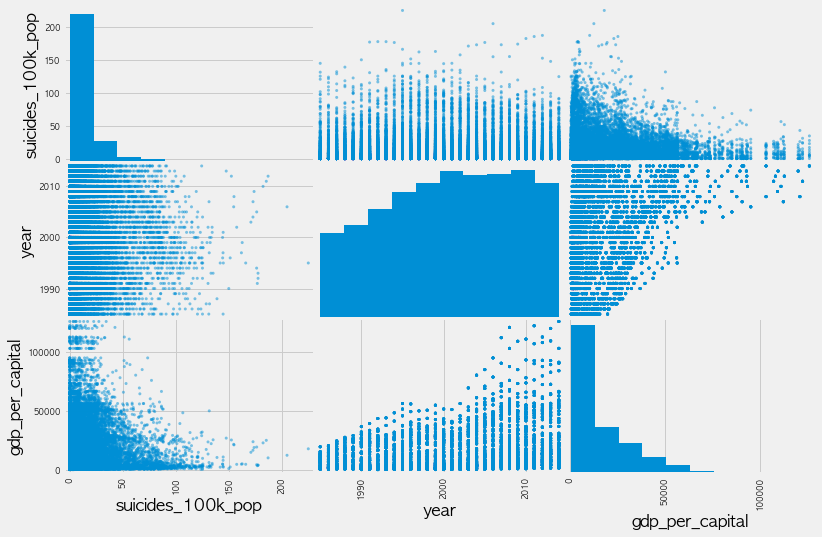

In [855]:

#A Cross-Validation set and a Test set. 
X_cv, X_test, y_cv, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

#We use a GridSearchCV to search for the best hyperparameters. In total we sampled 21000 different trees.
#I've truncated it for speed. 
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

params = {'max_leaf_nodes': list(range(93,95)), 'min_samples_split': list(range(6,8)), 'min_samples_leaf':list(range(2,4))}    
grid_search_cv = GridSearchCV(RandomForestRegressor(random_state=42),
                              params, n_jobs=-1, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error

y_pred = grid_search_cv.predict(X_cv)
tree_reg_mse = mean_squared_error(y_cv, y_pred)
tree_reg_rmse = np.sqrt(tree_reg_mse)
print("The Root-Mean-Squared Error for the CV set in a RandomForestRegression model is :",tree_reg_rmse)


#Based on the scatter plots below, there doesnt look like a linear relationship,and thus Linear
#regression would most likely not produce a good model. 

from pandas.plotting import scatter_matrix
attributes = ['suicides_100k_pop','year','gdp_per_capital']
scatter_matrix(suicide[attributes], figsize=(12,8))

#We perform a linear regression just for fun. 
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

y_pred_lin_reg = lin_reg.predict(X_cv)
lin_reg_mse = mean_squared_error(y_cv, y_pred_lin_reg)
lin_reg_rmse = np.sqrt(lin_reg_mse)
print("The Root-Mean-Squared Error for the CV set in a linear regression model is :",lin_reg_rmse)

#The Decision Tree is better w.r.t. the Cross-Validation data. 
print("The Decision Tree is better w.r.t. the Cross-Validation data.")

#We get our RMSE for the test set.


y_pred = grid_search_cv.predict(X_test)
tree_reg_mse = mean_squared_error(y_test, y_pred)
tree_reg_rmse = np.sqrt(tree_reg_mse)
print("The Root-Mean-Squared Error for the Test set in a Decision Tree Regression model is :",tree_reg_rmse)




In [835]:
X_train.columns

Index(['year', 'gdp_per_capital', 'sex_female', 'sex_male', 'age_15-24 years',
       'age_25-34 years', 'age_35-54 years', 'age_5-14 years',
       'age_55-74 years', 'age_75+ years', 'generation_Boomers',
       'generation_G.I. Generation', 'generation_Generation X',
       'generation_Generation Z', 'generation_Millenials', 'generation_Silent',
       'region_Asia', 'region_Europe', 'region_Island Nation',
       'region_MiddleEast', 'region_North America', 'region_South America'],
      dtype='object')

In [794]:
grid_search_cv

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_leaf_nodes': [93, 94], 'min_samples_split': [6, 7], 'min_samples_leaf': [2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [836]:
test = pd.read_csv("test_mini.csv")

In [837]:
population = test.population

In [838]:
test = test.drop(['country_year','HDI_for_year','population','gdp_for_year'],axis=1)

In [839]:
test

,country,year,sex,age,suicides_100k_pop,gdp_per_capital,generation
0,Antigua and Barbuda,2015,female,55-74 years,15.62,14853,Boomers
1,Antigua and Barbuda,2015,female,15-24 years,0.00,14853,Millenials
2,Antigua and Barbuda,2015,female,25-34 years,0.00,14853,Millenials
3,Antigua and Barbuda,2015,female,35-54 years,0.00,14853,Generation X
4,Antigua and Barbuda,2015,female,5-14 years,0.00,14853,Generation Z
5,Antigua and Barbuda,2015,female,75+ years,0.00,14853,Silent
6,Antigua and Barbuda,2015,male,15-24 years,0.00,14853,Millenials
7,Antigua and Barbuda,2015,male,25-34 years,0.00,14853,Millenials
8,Antigua and Barbuda,2015,male,35-54 years,0.00,14853,Generation X
9,Antigua and Barbuda,2015,male,5-14 years,0.00,14853,Generation Z


In [840]:
header

['country',
 'year',
 'sex',
 'age',
 'suicides_100k_pop',
 'gdp_per_capital',
 'generation',
 'region']

In [841]:
test = test.reindex(columns = header)  

In [842]:
test['region'] = test.country.map(lambda x: match_region(x))

In [843]:
test.iloc[:,1:]
test_cat = test.iloc[:,1:][['sex','age','generation','region']]
one_hot_data = pd.get_dummies(test_cat)
one_hot_data['generation_G.I. Generation'] = 0

In [844]:
year = test['year']
gdp_per_cap = test['gdp_per_capital']
suicides_100k_pop = test['suicides_100k_pop']

data = pd.concat([year, gdp_per_cap, one_hot_data], axis=1)

In [846]:
data['generation_G.I. Generation']=0

In [847]:
data

,year,gdp_per_capital,sex_female,sex_male,age_15-24 years,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,...,generation_Generation Z,generation_Millenials,generation_Silent,region_Asia,region_Europe,region_Island Nation,region_MiddleEast,region_North America,region_South America,generation_G.I. Generation
0,2015,14853,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,2015,14853,1,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,2015,14853,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,2015,14853,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2015,14853,1,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
5,2015,14853,1,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
6,2015,14853,0,1,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
7,2015,14853,0,1,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
8,2015,14853,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,2015,14853,0,1,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0


In [820]:
X_train.columns

Index(['year', 'gdp_per_capital', 'sex_female', 'sex_male', 'age_15-24 years',
       'age_25-34 years', 'age_35-54 years', 'age_5-14 years',
       'age_55-74 years', 'age_75+ years', 'generation_Boomers',
       'generation_Generation X', 'generation_Generation Z',
       'generation_Millenials', 'generation_Silent', 'region_Asia',
       'region_Europe', 'region_Island Nation', 'region_MiddleEast',
       'region_North America', 'region_South America',
       'generation_G.I. Generation'],
      dtype='object')

In [850]:
data = data.reindex(columns = X_train.columns)

In [851]:
grid_search_cv.predict(data)

array([  2.88602084,   2.88602084,   2.88602084,   2.88602084,
         0.47043825,   3.96542215,   9.66309425,   9.99945259,
         9.99945259,   0.7689703 ,   9.99945259,  12.36023548,
        38.66269621,  14.63132547,  20.01384174,  19.51319766,
        19.51319766,   4.79501345,   4.83004503,   4.79501345,
         4.79501345,   4.23383147,   0.7689703 ,   0.47043825,
        26.25911957,  18.68629345,  16.72712511,  18.68629345,
        16.97020579,   9.07234447,   5.18587286,   6.38230942,
        15.33022829,   5.18587286,   0.47043825,   0.7689703 ,
        27.26191161,  46.54410292,  25.87981092,  27.26191161,
        17.60582582,   7.47483651,   7.47483651,   7.47483651,
         7.50986808,  20.83966591,   0.47043825,   0.7689703 ,
        40.07039991,  23.64194257,  23.64194257,  11.65629948,
        21.2374921 ,  15.33022829,   9.07234447,   6.38230942,
         5.18587286,   5.18587286,   0.47043825,   0.7689703 ,
        42.76331462,  23.64194257,  23.64194257,  21.23

In [852]:
dd =grid_search_cv.predict(data)

In [853]:
dd=pd.Series(dd)

In [854]:
pd.concat([test,dd.to_frame('pred')],axis=1)

,country,year,sex,age,suicides_100k_pop,gdp_per_capital,generation,region,pred
0,Antigua and Barbuda,2015,female,55-74 years,15.62,14853,Boomers,Island Nation,2.886021
1,Antigua and Barbuda,2015,female,15-24 years,0.00,14853,Millenials,Island Nation,2.886021
2,Antigua and Barbuda,2015,female,25-34 years,0.00,14853,Millenials,Island Nation,2.886021
3,Antigua and Barbuda,2015,female,35-54 years,0.00,14853,Generation X,Island Nation,2.886021
4,Antigua and Barbuda,2015,female,5-14 years,0.00,14853,Generation Z,Island Nation,0.470438
5,Antigua and Barbuda,2015,female,75+ years,0.00,14853,Silent,Island Nation,3.965422
6,Antigua and Barbuda,2015,male,15-24 years,0.00,14853,Millenials,Island Nation,9.663094
7,Antigua and Barbuda,2015,male,25-34 years,0.00,14853,Millenials,Island Nation,9.999453
8,Antigua and Barbuda,2015,male,35-54 years,0.00,14853,Generation X,Island Nation,9.999453
9,Antigua and Barbuda,2015,male,5-14 years,0.00,14853,Generation Z,Island Nation,0.768970


In [804]:
data

,year,gdp_per_capital,sex_female,sex_male,age_15-24 years,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,...,generation_Generation Z,generation_Millenials,generation_Silent,region_Asia,region_Europe,region_Island Nation,region_MiddleEast,region_North America,region_South America,generation_G.I. Generation
0,2015,14853,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,2015,14853,1,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,2015,14853,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,2015,14853,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2015,14853,1,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
5,2015,14853,1,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
6,2015,14853,0,1,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
7,2015,14853,0,1,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
8,2015,14853,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,2015,14853,0,1,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0


In [861]:
ss = pd.concat([test, pd.Series(grid_search_cv.predict(data)).to_frame("pred")],axis=1)

ss2 = ss.groupby('country')['pred'].mean().reset_index()

In [862]:
ss2

,country,pred
0,Antigua and Barbuda,5.730883
1,Argentina,11.418549
2,Armenia,11.643756
3,Australia,16.380585
4,Austria,13.553676
5,Belgium,13.778086
6,Belize,9.155452
7,Brazil,11.107848
8,Chile,11.418549
9,Colombia,10.487663


In [863]:
ee = pd.merge(compare,ss2,on='country')
ee['pred_per_pop'] = ee['pred'] / 100000
ee['est_sui'] = ee['population'] * ee['pred_per_pop']

In [864]:
ee

,country,year,population,suicides_no,pred,pred_per_pop,est_sui
0,Antigua and Barbuda,2015,91889.0,1.0,5.730883,0.000057,5.266052
1,Argentina,2015,39699624.0,3073.0,11.418549,0.000114,4533.120892
2,Armenia,2015,2795335.0,74.0,11.643756,0.000116,325.481991
3,Australia,2015,22240785.0,3027.0,16.380585,0.000164,3643.170598
4,Austria,2015,8219386.0,1251.0,13.553676,0.000136,1114.028955
5,Belgium,2015,10624356.0,1867.0,13.778086,0.000138,1463.832869
6,Belize,2015,319835.0,26.0,9.155452,0.000092,29.282340
7,Brazil,2015,191087085.0,11163.0,11.107848,0.000111,21225.662364
8,Chile,2015,16565725.0,1838.0,11.418549,0.000114,1891.565373
9,Colombia,2015,44490427.0,2332.0,10.487663,0.000105,4666.006036


In [431]:
xx = pd.merge(compare, ss2, on = 'country')

In [434]:
xx['err'] = xx['suicides_no'] - xx['pred']

xx['err_abs'] = abs(xx['err'])

xx.sort_values('err_abs',ascending=False)

,country,year,population,suicides_no,pred,err,err_abs
43,Republic of Korea,2015,48671752.0,13510.0,12653.558787,856.441213,856.441213
27,Japan,2015,120376310.0,23092.0,23935.233792,-843.233792,843.233792
19,Germany,2015,78136683.0,10088.0,10699.599335,-611.599335,611.599335
55,Thailand,2015,61261276.0,4205.0,4618.436230,-413.436230,413.436230
45,Russian Federation,2015,137018943.0,25432.0,25089.707256,342.292744,342.292744
35,Mexico,2015,114357884.0,6234.0,6525.592656,-291.592656,291.592656
26,Italy,2015,58117697.0,3988.0,3768.847438,219.152562,219.152562
52,Spain,2015,44186528.0,3604.0,3816.124238,-212.124238,212.124238
5,Belgium,2015,10624356.0,1867.0,1657.272888,209.727112,209.727112
7,Brazil,2015,191087085.0,11163.0,10954.695745,208.304255,208.304255


In [432]:
true = xx.suicides_no
pred = xx.pred
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(true, pred))

212.3704869584981